# 📚 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

import warnings
warnings.filterwarnings('ignore')

**The csv file isn't actually encoded in UTF-8. It contains the latin-1 encoding which must be specified when the data is read in. Else, it wil be interpreted wrongly**

# 🧾 Load Data

In [2]:
mail=pd.read_csv(r'spam.csv', encoding='latin-1')

In [3]:
mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# ⚙Data Cleaning and Preprocessing

In [4]:
mail.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
#statistical information
mail.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
mail.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### The data contains some function which are null and as at such the columns can be dropped

In [8]:
mail.drop(['Unnamed: 2','Unnamed: 3',"Unnamed: 4"],axis=1,inplace=True)

In [9]:
mail.isna().sum()

v1    0
v2    0
dtype: int64

In [10]:
mail.duplicated().sum()

403

In [11]:
mail.drop_duplicates(keep='first',inplace=True)

In [12]:
mail.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
mail.duplicated().sum()

0

In [14]:
mail['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [15]:
mail.shape

(5169, 2)

In [16]:
mail['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

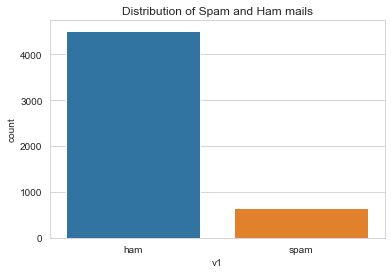

In [18]:
sns.set_style("whitegrid")
plt.title('Distribution of Spam and Ham mails')
sns.countplot(mail['v1'])
plt.plot

The mails look imbalanced, so we can balance the dataset by ensuring the number of spam mail is equivalen to the ham mails

In [19]:
# Balancing the dataset by breaking it into spam and ham mails
ham=mail[mail['v1']=='ham']
spam=mail[mail['v1']=='spam']

In [20]:
print(ham.shape)
print(spam.shape)

(4516, 2)
(653, 2)


In [21]:
ham=ham.sample(800)

In [22]:
ham.shape

(800, 2)

In [23]:
ham

,v1,v2
746,ham,"I promise to take good care of you, princess. ..."
3541,ham,ÌÏ come lt 25 n pass to me lar
4221,ham,Yo you around? A friend of mine's lookin to pi...
4436,ham,How come u got nothing to do?
4847,ham,S.this will increase the chance of winning.
...,...,...
416,ham,Alright i have a new goal now
4510,ham,Sorry I missed you babe. I was up late and sle...
4972,ham,Oops I was in the shower when u called. Hey a ...
487,ham,Dear reached railway. What happen to you


In [24]:
# Concatenate the new ham dataset with the existing spam dataset
mail=pd.concat([spam,ham],ignore_index=True)

In [25]:
mail.shape

(1453, 2)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

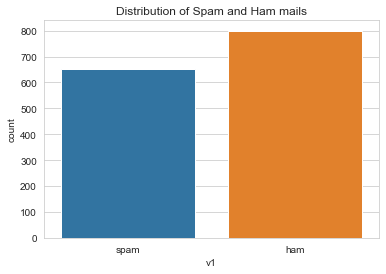

In [26]:
sns.set_style("whitegrid")
plt.title('Distribution of Spam and Ham mails')
sns.countplot(mail['v1'])
plt.plot

In [27]:
mail['v1'].value_counts()

ham     800
spam    653
Name: v1, dtype: int64

In [28]:
mail

,v1,v2
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
1448,ham,Alright i have a new goal now
1449,ham,Sorry I missed you babe. I was up late and sle...
1450,ham,Oops I was in the shower when u called. Hey a ...
1451,ham,Dear reached railway. What happen to you


## It is clearly seen that v1 is the target and v2 is the features hence it needs renaming


In [29]:
new_columns=['target','text']

In [30]:
mail.columns=new_columns

In [31]:
mail

,target,text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
1448,ham,Alright i have a new goal now
1449,ham,Sorry I missed you babe. I was up late and sle...
1450,ham,Oops I was in the shower when u called. Hey a ...
1451,ham,Dear reached railway. What happen to you


In [32]:
mail=pd.DataFrame(mail,columns=['text','target'])

In [33]:
mail

,text,target
0,Free entry in 2 a wkly comp to win FA Cup fina...,spam
1,FreeMsg Hey there darling it's been 3 week's n...,spam
2,WINNER!! As a valued network customer you have...,spam
3,Had your mobile 11 months or more? U R entitle...,spam
4,"SIX chances to win CASH! From 100 to 20,000 po...",spam
...,...,...
1448,Alright i have a new goal now,ham
1449,Sorry I missed you babe. I was up late and sle...,ham
1450,Oops I was in the shower when u called. Hey a ...,ham
1451,Dear reached railway. What happen to you,ham


## Label Encoding
### Since computers only understands numbers then we convert spam and ham to 0 and 1 respectively

In [34]:
#encoding
mail['target'].replace('ham',0,inplace=True)


In [35]:
mail

,text,target
0,Free entry in 2 a wkly comp to win FA Cup fina...,spam
1,FreeMsg Hey there darling it's been 3 week's n...,spam
2,WINNER!! As a valued network customer you have...,spam
3,Had your mobile 11 months or more? U R entitle...,spam
4,"SIX chances to win CASH! From 100 to 20,000 po...",spam
...,...,...
1448,Alright i have a new goal now,0
1449,Sorry I missed you babe. I was up late and sle...,0
1450,Oops I was in the shower when u called. Hey a ...,0
1451,Dear reached railway. What happen to you,0


In [36]:
mail['target'].replace('spam',1,inplace=True)

In [37]:
mail

,text,target
0,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,FreeMsg Hey there darling it's been 3 week's n...,1
2,WINNER!! As a valued network customer you have...,1
3,Had your mobile 11 months or more? U R entitle...,1
4,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
1448,Alright i have a new goal now,0
1449,Sorry I missed you babe. I was up late and sle...,0
1450,Oops I was in the shower when u called. Hey a ...,0
1451,Dear reached railway. What happen to you,0


In [38]:
mail.sample(10)

,text,target
451,"Thanks for your ringtone order, reference numb...",1
1030,In the end she might still vomit but its okay....,0
614,Get your garden ready for summer with a FREE s...,1
59,FREE entry into our å£250 weekly competition j...,1
883,"fyi I'm at usf now, swing by the room whenever",0
566,Cashbin.co.uk (Get lots of cash this weekend!)...,1
765,I uploaded mine to Facebook,0
659,Oh k. . I will come tomorrow,0
1295,Havent shopping now lor i juz arrive only,0
943,Can not use foreign stamps in this country.,0


In [39]:
mail.shape

(1453, 2)

In [40]:
def clean(text):
    #Import regular expression and nltk
    import re
    import string
    from nltk.stem import PorterStemmer
    from nltk.tokenize import word_tokenize
    
    #Create an instance
    stemmer = PorterStemmer()
    
    #Remove numbers and other special characters
    text = re.sub("[^a-zA-Z]"," ",text)
    
    #tokenize the words
    tokens = word_tokenize(text)
    
    #Stem each word by reducting them to their base or root words
    stemmed_text = ' '.join([stemmer.stem(word) for word in tokens])
    
    return stemmed_text

In [41]:
mail.text = mail.text.apply(clean)

In [42]:
mail

,text,target
0,free entri in a wkli comp to win fa cup final ...,1
1,freemsg hey there darl it s been week s now an...,1
2,winner as a valu network custom you have been ...,1
3,had your mobil month or more u r entitl to upd...,1
4,six chanc to win cash from to pound txt csh an...,1
...,...,...
1448,alright i have a new goal now,0
1449,sorri i miss you babe i wa up late and slept i...,0
1450,oop i wa in the shower when u call hey a park ...,0
1451,dear reach railway what happen to you,0


# 🔧Feature Engineering

In [43]:
X=mail.iloc[:,0]
print(X)

0       free entri in a wkli comp to win fa cup final ...
1       freemsg hey there darl it s been week s now an...
2       winner as a valu network custom you have been ...
3       had your mobil month or more u r entitl to upd...
4       six chanc to win cash from to pound txt csh an...
                              ...                        
1448                        alright i have a new goal now
1449    sorri i miss you babe i wa up late and slept i...
1450    oop i wa in the shower when u call hey a park ...
1451                dear reach railway what happen to you
1452    oh unintent not bad time great finger the trai...
Name: text, Length: 1453, dtype: object


In [44]:
y=mail['target']
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
1448    0
1449    0
1450    0
1451    0
1452    0
Name: target, Length: 1453, dtype: int64


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#Splitting the data in to train and test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=3)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(1453,) (973,) (480,)


Since the computer doesn't understands text, then we have to convert the column into a numerical values using the TfidfVectorizer

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [50]:
X_train_vect=vectorizer.fit_transform(X_train)

In [51]:
print(X_train_vect)

  (0, 2215)	1.0
  (1, 1119)	0.263365846178211
  (1, 559)	0.3063815896510335
  (1, 2302)	0.4460936063876451
  (1, 1722)	0.4460936063876451
  (1, 2376)	0.25017458071970256
  (1, 266)	0.4460936063876451
  (1, 342)	0.4209310095154031
  (2, 1891)	0.30072173911866723
  (2, 1317)	0.38501865957351794
  (2, 1992)	0.560589696565367
  (2, 1373)	0.30955988031946113
  (2, 2314)	0.26726574582076357
  (2, 523)	0.5289687713975915
  (3, 1510)	0.4310016382064291
  (3, 2318)	0.4310016382064291
  (3, 562)	0.4310016382064291
  (3, 2240)	0.3651298660981703
  (3, 1005)	0.4310016382064291
  (3, 395)	0.2576976330463324
  (3, 1595)	0.2392121699641296
  (4, 2397)	0.2870688685107801
  (4, 655)	0.32718600949955273
  (4, 1332)	0.23756289196445007
  (4, 531)	0.392467841680072
  :	:
  (969, 1184)	0.20920193772638085
  (969, 332)	0.1909268606093904
  (969, 1119)	0.17378102866814052
  (970, 1086)	0.4549756986577983
  (970, 1526)	0.4549756986577983
  (970, 2455)	0.35977626626128434
  (970, 580)	0.3470749675465001
  (970

In [52]:
X_test_vect=vectorizer.transform(X_test)

In [53]:
print(X_test_vect)

  (0, 2160)	0.15220502247197434
  (0, 2059)	0.16253479467997756
  (0, 1849)	0.3203305173882109
  (0, 1728)	0.21149223931644237
  (0, 1399)	0.2404843642717731
  (0, 1309)	0.5203745504364495
  (0, 1255)	0.3203305173882109
  (0, 954)	0.2533043365952543
  (0, 798)	0.279497865833749
  (0, 336)	0.3203305173882109
  (0, 335)	0.2894418089082379
  (0, 332)	0.2077765057993142
  (1, 260)	1.0
  (2, 2486)	0.2774365794524935
  (2, 2389)	0.29722671973065484
  (2, 2084)	0.2774365794524935
  (2, 1821)	0.29722671973065484
  (2, 1782)	0.18324059302850434
  (2, 1602)	0.24639492714497618
  (2, 1146)	0.29722671973065484
  (2, 642)	0.255871389323345
  (2, 430)	0.24096617168034634
  (2, 332)	0.4551426464653183
  (2, 248)	0.2155224552199781
  (2, 187)	0.3310581879936008
  :	:
  (477, 833)	0.27643820517225504
  (477, 439)	0.4795450545360981
  (477, 250)	0.4524955772143282
  (478, 2428)	0.32339717530932877
  (478, 2016)	0.3024757733727233
  (478, 2015)	0.33009834521536807
  (478, 1886)	0.290662300788943
  (478, 

# 🤖 Machine Learning

## Building our model 

In [54]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),KNeighborsClassifier()]

acc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

train_acc_scores = []
test_acc_scores = []

mis_cla_scores = []
total_time_taken = []

In [55]:
#Fitting the models
for model in models:
    start_time = time.time()
    
    model.fit(X_train_vect,y_train)
    
    y_test_pred = model.predict(X_test_vect)
    y_train_pred = model.predict(X_train_vect)
    
    end_time = time.time()
    time_taken = round(end_time - start_time,3) 
    
    train_acc = round(accuracy_score(y_train,y_train_pred),4)
    test_acc = round(accuracy_score(y_test,y_test_pred),4)
    
    precision = round(precision_score(y_test,y_test_pred),4)
    recall = round(recall_score(y_test,y_test_pred),4)
    f1 = round(f1_score(y_test,y_test_pred),4)
    miscla = (y_test!=y_test_pred).sum()
    
    print(f"The accuracy score of {model.__class__.__name__} is {test_acc*100}%")
    print(f"The misclassifed points are {miscla} out of {X_test.shape[0]}")
    print(f"The time taken in seconds is {time_taken}")
    
    train_acc_scores.append(train_acc)
    test_acc_scores.append(test_acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    mis_cla_scores.append(miscla)
    total_time_taken.append(time_taken)
    
    print()

The accuracy score of LogisticRegression is 94.78999999999999%
The misclassifed points are 25 out of 480
The time taken in seconds is 0.074

The accuracy score of DecisionTreeClassifier is 90.21000000000001%
The misclassifed points are 47 out of 480
The time taken in seconds is 0.089

The accuracy score of RandomForestClassifier is 93.54%
The misclassifed points are 31 out of 480
The time taken in seconds is 1.263

The accuracy score of SVC is 95.21%
The misclassifed points are 23 out of 480
The time taken in seconds is 0.598

The accuracy score of KNeighborsClassifier is 90.21000000000001%
The misclassifed points are 47 out of 480
The time taken in seconds is 0.408



## 📊Visualizing the Models accuracy score

In [56]:
result={'models':['LR','LR','LR','LR',
                  'DTC','DTC','DTC','DTC',
                  'RFC','RFC','RFC','RFC',
                  'SVC','SVC','SVC','SVC',
                  'KNC','KNC','KNC','KNC',],
        
      "metrics":["Test Accuracy", "F1 Scores", "Precision", "Recall",
                 "Test Accuracy", "F1 Scores", "Precision", "Recall",
                 "Test Accuracy", "F1 Scores", "Precision", "Recall",
                 "Test Accuracy", "F1 Scores", "Precision", "Recall",
                 "Test Accuracy", "F1 Scores", "Precision", "Recall",],
        
      "values":test_acc_scores+f1_scores+precision_scores+recall_scores
      }

In [57]:
other_result={"models":["LR","DTC","RFC","SVC","KNC"],
    "mis_cla":mis_cla_scores,
      "train_acc_score":train_acc_scores,
      "test_acc_score":test_acc_scores,
      "time_taken":total_time_taken
    }

In [58]:
pd.DataFrame(result)

,models,metrics,values
0,LR,Test Accuracy,0.9479
1,LR,F1 Scores,0.9021
2,LR,Precision,0.9354
3,LR,Recall,0.9521
4,DTC,Test Accuracy,0.9021
5,DTC,F1 Scores,0.9433
6,DTC,Precision,0.8962
7,DTC,Recall,0.9300
8,RFC,Test Accuracy,0.9481
9,RFC,F1 Scores,0.8873


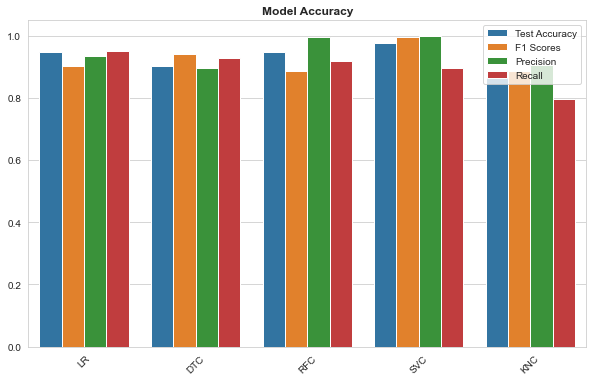

In [59]:
#Models in percentage
plt.figure(figsize=(10,6))
sns.barplot(result['models'],result['values'],hue=result["metrics"])
plt.title('Model Accuracy',fontweight="bold")
plt.xticks(rotation=45)
plt.show()

In [60]:
pd.DataFrame(other_result)

,models,mis_cla,train_acc_score,test_acc_score,time_taken
0,LR,25,0.9651,0.9479,0.074
1,DTC,47,1.0000,0.9021,0.089
2,RFC,31,1.0000,0.9354,1.263
3,SVC,23,0.9990,0.9521,0.598
4,KNC,47,0.9096,0.9021,0.408


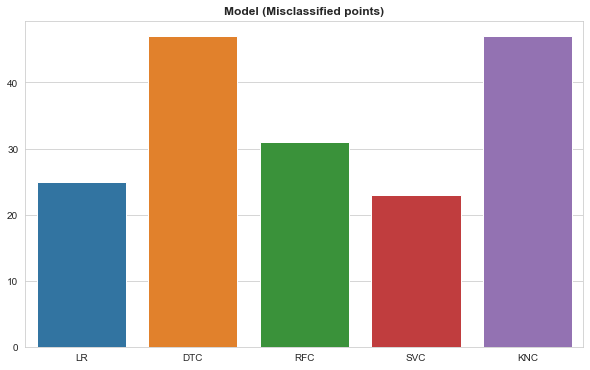

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(other_result['models'],other_result['mis_cla'])
plt.title('Model (Misclassified points)',fontweight="bold")
plt.show()

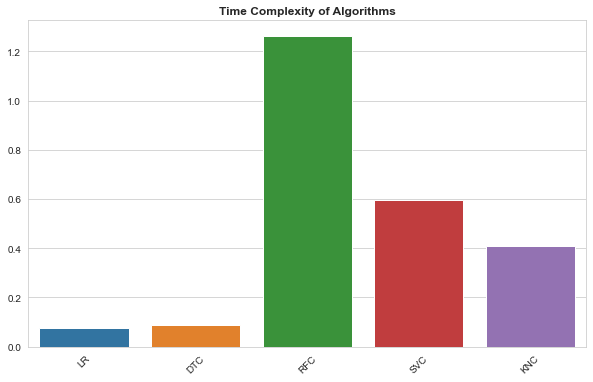

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(other_result['models'],other_result['time_taken'])
plt.title('Time Complexity of Algorithms',fontweight="bold")
plt.xticks(rotation=45)
plt.show()

Decision tree takes lesser time to execute and seems the best out of all with a good accuracy score, and other metric score

# Conclusion:

It is evident that Support Vector Classifier is the best model after achieving the following:
* Accuracy: 95.21%
* F1 Score: 99.53%
* Precision: 100%
* Recall: 89.66%
* Miusclassified points: 23 
* Time taken: 0.598 sec

In [63]:
svc = SVC()
svc.fit(X_train_vect,y_train)

SVC()

## Testing new dataset on the model

In [64]:
input_mail=[]
entered_mail=input('Enter a mail: ')
input_mail.append(entered_mail)

Enter a mail: URGENT: Your account security has been compromised. Click the link to secure your account immediately


In [65]:
#Vectorise the mail
v_mail=vectorizer.transform(input_mail)

In [66]:
print(v_mail)

  (0, 2317)	0.27887449450005924
  (0, 1179)	0.4616664166778622
  (0, 371)	0.4616664166778622
  (0, 14)	0.7042423274278404


In [67]:
prediction=svc.predict(v_mail)
prediction[0]

0

In [68]:
if prediction[0]==0:
    print("The mail is a non-spam mail")
else:
    print("The mail is a spam mail")

The mail is a non-spam mail


## Saving the model

In [69]:
import joblib

In [70]:
joblib.dump(svc,'spam-detector.sav')

['spam-detector.sav']

In [71]:
joblib.dump(vectorizer,"spam_vect.sav")

['spam_vect.sav']

# The End! Thank you for your time🤗😍😊